# Nenadgledano učenje - drugi projekat

## Dataset - Beauty

Cilj drugog projekta je bio da se istraže metode nenadgledanog učenja, a da se zatim primene nad nekim skupom podataka pogodnim za ovakve probleme. Dataset koji je odabran se bavi lepotom ispitanika na osnovu nekih parametara kao što su plata, godine radnog iskustva, da li su dobrog zdravlja, pol, bračni status, godine provedene u edukaciji...

## Importovi biblioteka koje su korišćene za implementaciju

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

## Učitavanje dataset-a uz pomoć biblioteke pandas

In [3]:
path = 'beauty.csv'
data = pd.read_csv(path)
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Biranje određenih kolona iz dataset-a pre obrade

In [4]:
data = data[['wage', 'exper', 'goodhlth','female', 'married','educ','looks']]

## PCA redukcija dimenzionalnosti

Koriscenjem PCA (principal component analysis) vrši se redukcija dimenzionalnosti na 3 komponente sa najvećim značajem (varijansom). Redukcija na svega tri dimenzije nam omogućava vizuelizaciju klasterizovanih podataka, da bismo lakše uočili kvalitet klasterizacije.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
pca = PCA(n_components=3)
data = pca.fit_transform(data)

## KMeans algoritam

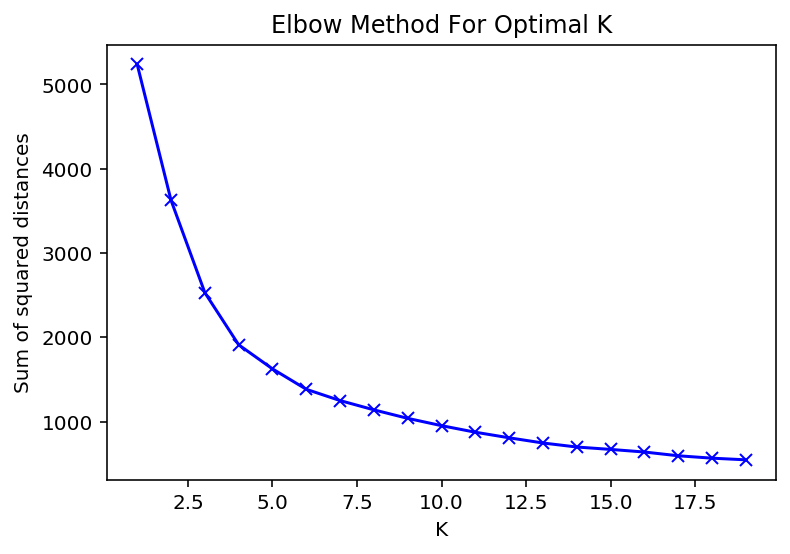

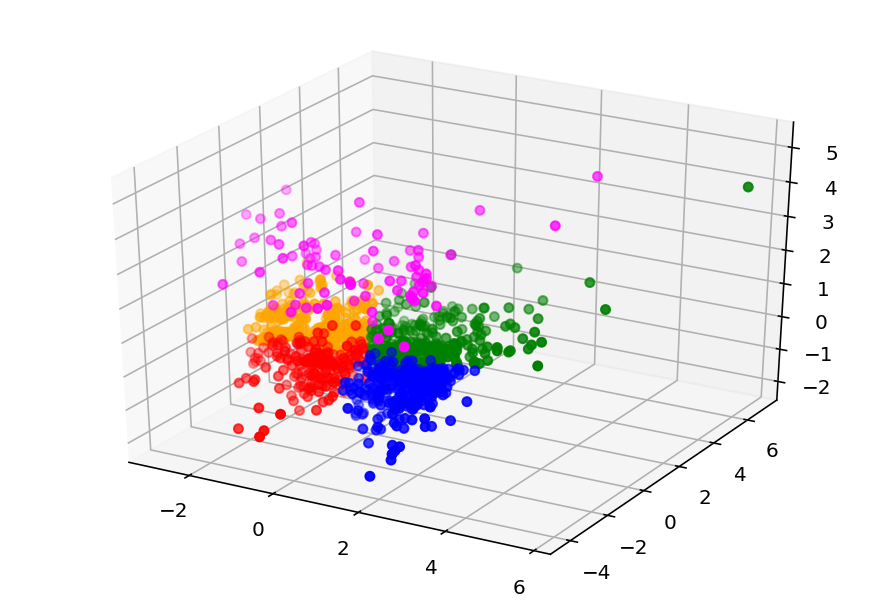

Silhouette score is 0.3259893730517267.
Davies-Bouldin score is 0.9652862375379119.


In [7]:
def kMeans(data):
    # Elbow Method For Optimal Cluster Count
    sum_of_squared_distances = []
    K = range(1, 20)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('K')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal K')
    plt.show()

    cluster_count = 5
    km = KMeans(
        n_clusters=cluster_count, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )

    # Dobijanje modela i prediktovanih podataka, a zatim iscrtavanje

    model = km.fit(data)
    p = km.fit_predict(data)

    k_arrays = []
    for i in range(cluster_count):
        k_arrays.append([])

    for i in range(len(p)):
        k_arrays[p[i]].append(data[i])

    for i in range(cluster_count):
        k_arrays[i] = np.asarray(k_arrays[i])

    colors = ['red', 'green', 'blue', 'magenta', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'black', 'grey']

    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(cluster_count):
        ax.scatter(k_arrays[i][:, 0],k_arrays[i][:, 1],k_arrays[i][:, 2], color=colors[i])

    plt.show()

    # Metrika za određivanje kvaliteta klasterizacije

    labels = model.labels_
    silhouette_score = metrics.silhouette_score(data, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(data, labels)

    print("Silhouette score is {}.".format(silhouette_score))
    print("Davies-Bouldin score is {}.".format(davies_bouldin_score))


kMeans(data)


## DBSCAN

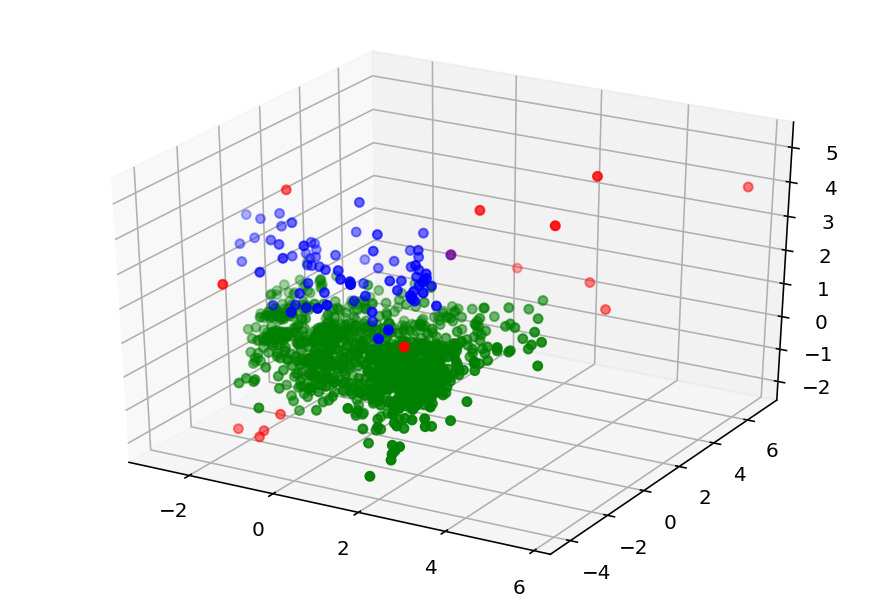

Silhouette score is 0.5130376557757808.
Davies-Bouldin score is 2.441887439133784.


In [11]:
def dbscan(data):
    # Određivanje modela i predikcija pripadnosti klasteru pomoću DBSCAN - algoritma, nakon toga iscrtavanje

    dbscan = DBSCAN(eps=1.2, min_samples=10)
    model = dbscan.fit(data)
    p = dbscan.fit_predict(data)

    maxc = -1
    for i in range(len(p)):
        p[i] = p[i] + 1
        if p[i] > maxc:
            maxc = p[i]

    cluster_count = maxc + 1

    cluster_arrays = []
    for i in range(cluster_count):
        cluster_arrays.append([])

    for i in range(len(p)):
        cluster_arrays[p[i]].append(data[i])

    for i in range(cluster_count):
        cluster_arrays[i] = np.asarray(cluster_arrays[i])

    colors = ['red', 'green', 'blue', 'magenta', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'black', 'grey']

    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(cluster_count):
        ax.scatter(cluster_arrays[i][:, 0], cluster_arrays[i][:, 1], cluster_arrays[i][:, 2], color=colors[i])

    plt.show()

    # Metrika za određivanje kvaliteta klasterizacije

    labels = model.labels_
    silhouette_score = metrics.silhouette_score(data, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(data, labels)

    print("Silhouette score is {}.".format(silhouette_score))
    print("Davies-Bouldin score is {}.".format(davies_bouldin_score))

dbscan(data)


## Hierarchical Clustering

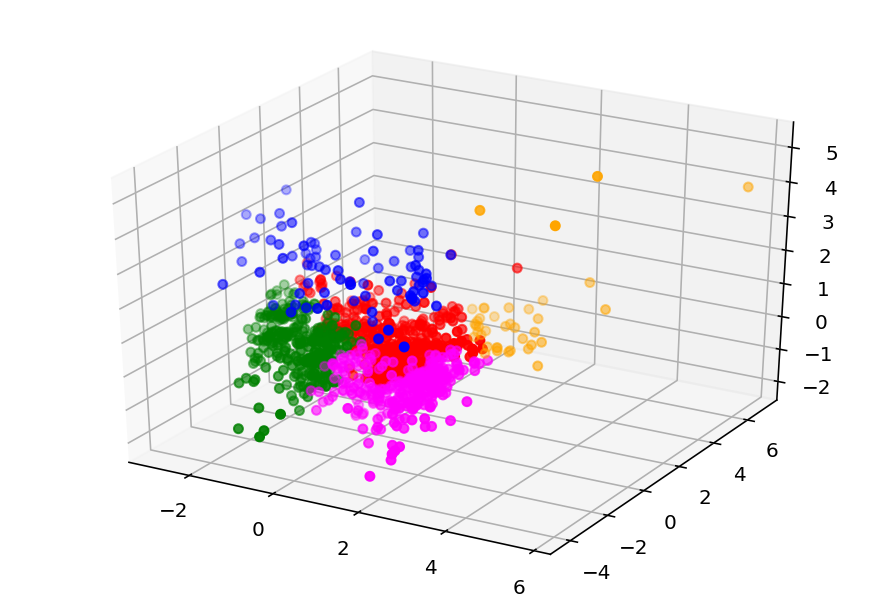

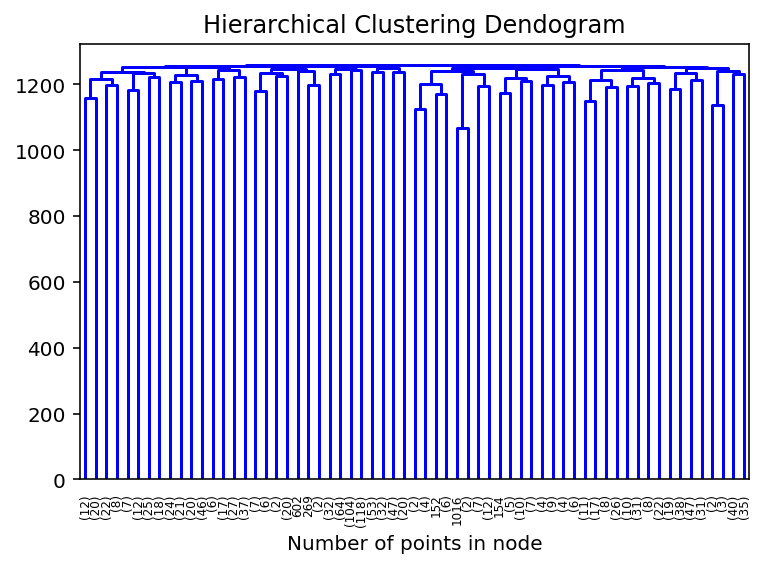

Silhouette score is 0.310510978384562.
Davies-Bouldin score is 0.9397359755373638.


In [13]:
from scipy.cluster.hierarchy import dendrogram

def HierarchicalClustering(data):
    # Određivanje modela i predikcija pripadnosti klasteru pomoću hijerahijskog klasterovanja, nakon toga iscrtavanje

    cluster_count = 5
    agglC = AgglomerativeClustering(n_clusters=cluster_count)
    p = agglC.fit_predict(data)
    model = agglC.fit(data)

    cluster_arrays = []
    for i in range(cluster_count):
        cluster_arrays.append([])

    for i in range(len(p)):
        cluster_arrays[p[i]].append(data[i])

    for i in range(cluster_count):
        cluster_arrays[i] = np.asarray(cluster_arrays[i])

    colors = ['red', 'green', 'blue', 'magenta', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'black', 'grey']

    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(cluster_count):
        ax.scatter(cluster_arrays[i][:, 0], cluster_arrays[i][:, 1], cluster_arrays[i][:, 2], color=colors[i])

    plt.show()

    # Priprema podataka i iscrtavanje dendograma

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    distance = np.arange(model.children_.shape[0])
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, distance,
                                        counts]).astype(float)

    plt.title('Hierarchical Clustering Dendogram')
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.xlabel('Number of points in node')
    plt.show()

    # Metrika za određivanje kvaliteta klasterizacije

    labels = model.labels_
    silhouette_score = metrics.silhouette_score(data, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(data, labels)

    print("Silhouette score is {}.".format(silhouette_score))
    print("Davies-Bouldin score is {}.".format(davies_bouldin_score))

HierarchicalClustering(data)
